<a href="https://colab.research.google.com/github/sumitra122/Facial_Recognition/blob/master/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline
 
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Distribution of volcanoes-
The simple case of a classification task, in which the two classes of points are well separated:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


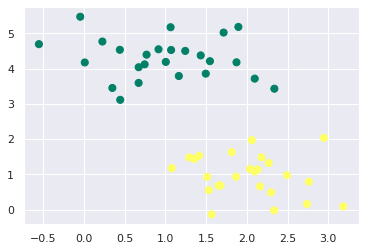

In [0]:
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='summer');

many possible separators

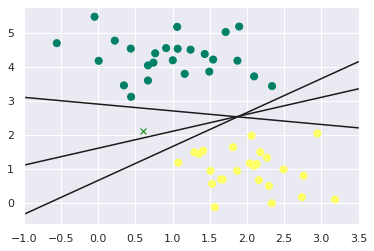

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='green')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);


plotting the margins

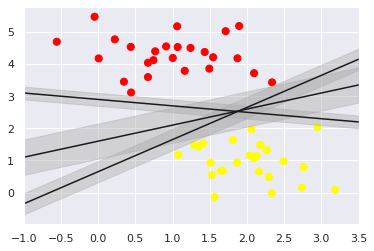

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Traing svm model

In [0]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Visualizing

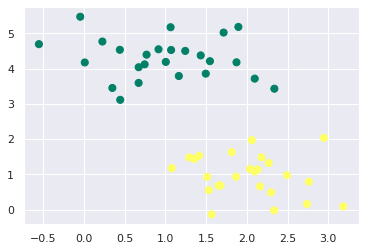

In [0]:
plt.scatter(x[:,0], x[:, 1], c=y, s=50, cmap='summer')


In the above codes I have just get revised what support vector machine(svm) can perform.
Now in this below code is an example of facial recognition where I am going to use a default dataset of faces that is provides by sciktlearn libraries.

Importing Dataset

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


create a plt

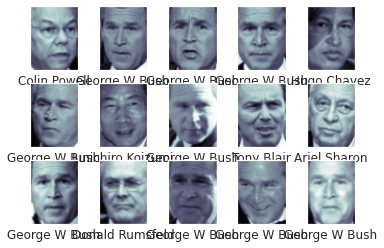

In [0]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


processing the dataset

In [0]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=150, whiten=True, random_state=42)

svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(svc)

split

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [0]:
print(Xtrain, Xtest, ytrain, ytest)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.0001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

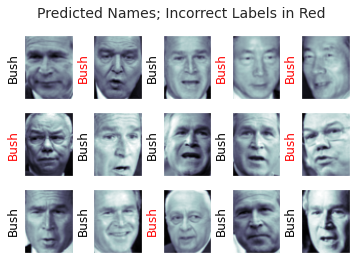

In [0]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.00      0.00      0.00        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.37      1.00      0.54       126
Gerhard Schroeder       0.00      0.00      0.00        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       0.00      0.00      0.00        12
       Tony Blair       0.00      0.00      0.00        42

         accuracy                           0.37       337
        macro avg       0.05      0.12      0.07       337
     weighted avg       0.14      0.37      0.20       337



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


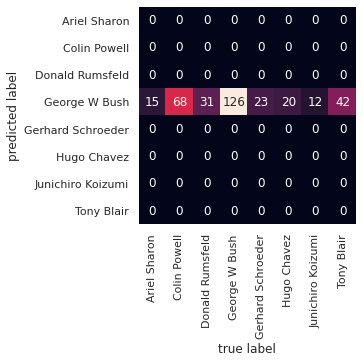

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');